In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import random as rd
Data_test = pd.read_excel("kendaraan_test.xlsx")
Data_train = pd.read_excel("kendaraan_train.xlsx")
Data_test


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,41,1,0,0,1-2 Tahun,Pernah,2630,78,20,0
47635,Pria,39,1,0,0,1-2 Tahun,Pernah,2630,124,200,0
47636,Pria,33,1,0,1,< 1 Tahun,Tidak,2630,152,152,0
47637,Wanita,71,1,0,0,1-2 Tahun,Pernah,2630,25,226,0


In [57]:
Data_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [58]:
dataframe = pd.concat([Data_test,Data_train]).drop_duplicates().reset_index(drop=True)
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,id
0,Wanita,22.0,1.0,52.0,0.0,1-2 Tahun,Pernah,32895.0,124.0,71.0,1,NaN
1,Pria,54.0,1.0,52.0,0.0,1-2 Tahun,Pernah,43388.0,124.0,198.0,0,NaN
2,Wanita,24.0,1.0,52.0,0.0,1-2 Tahun,Pernah,45032.0,124.0,171.0,0,NaN
3,Wanita,78.0,1.0,52.0,0.0,> 2 Tahun,Pernah,42825.0,26.0,208.0,1,NaN
4,Wanita,45.0,1.0,52.0,0.0,1-2 Tahun,Pernah,2630.0,26.0,228.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
333462,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0,285827.0
333463,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0,285828.0
333464,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0,285829.0
333465,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0,285830.0


In [59]:
dataframe.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
id                   47636
dtype: int64

In [60]:
trash = len(dataframe) * 0.9
dataframe = dataframe.dropna(thresh=trash, axis='columns')
dataframe.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [61]:
dataframe.dropna(axis= 0 , inplace= True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
dataframe.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [63]:
arry = []
for i in range( len(dataframe.columns)):
  m = dataframe[dataframe.columns[i]].describe()
  arry.append(m)

arry

[count     218704
 unique         2
 top         Pria
 freq      118360
 Name: Jenis_Kelamin, dtype: object, count    218704.000000
 mean         38.817525
 std          15.535484
 min          20.000000
 25%          25.000000
 50%          36.000000
 75%          49.000000
 max          85.000000
 Name: Umur, dtype: float64, count    218704.000000
 mean          0.997929
 std           0.045464
 min           0.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max           1.000000
 Name: SIM, dtype: float64, count    218704.000000
 mean         26.393916
 std          13.251813
 min           0.000000
 25%          15.000000
 50%          28.000000
 75%          35.000000
 max          52.000000
 Name: Kode_Daerah, dtype: float64, count    218704.000000
 mean          0.459319
 std           0.498343
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max           1.000000
 Name: Sudah_Asuransi, dtype: floa

In [64]:
from sklearn.preprocessing import LabelEncoder
dataframe = dataframe.apply(lambda series: pd.Series(LabelEncoder().fit_transform(series[series.notnull()]),index=series[series.notnull()].index))
dataframe

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,2,1,52,0,0,0,14834,115,61,1
1,0,34,1,52,0,0,0,25230,115,188,0
2,1,4,1,52,0,0,0,26800,115,161,0
3,1,58,1,52,0,2,0,24691,23,198,1
4,1,25,1,52,0,0,0,0,23,218,0
...,...,...,...,...,...,...,...,...,...,...,...
333462,1,3,1,4,1,1,1,7929,138,207,0
333463,1,1,1,46,1,1,1,26477,138,40,0
333464,1,3,1,50,1,1,1,30960,138,216,0
333465,0,48,1,7,1,0,1,12442,115,260,0


In [65]:
# Untuk mencari korelasi antar  kolom
dataframeCorr = dataframe.corr()
dataframeCorr

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,-0.144548,0.019344,-0.000434,0.083688,0.114116,0.091747,-0.018471,0.109138,0.003140,-0.052337
Umur,-0.144548,1.000000,-0.078821,0.043295,-0.254967,-0.525083,-0.267745,0.120207,-0.568805,-0.001297,0.109285
SIM,0.019344,-0.078821,1.000000,-0.003973,0.015554,0.027439,0.017594,-0.015639,0.042677,0.000498,0.009904
Kode_Daerah,-0.000434,0.043295,-0.003973,1.000000,-0.023917,-0.027197,-0.026335,-0.015012,-0.042867,-0.004417,0.011861
Sudah_Asuransi,0.083688,-0.254967,0.015554,-0.023917,1.000000,0.175197,0.825417,-0.034254,0.213577,0.001699,-0.340790
Umur_Kendaraan,0.114116,-0.525083,0.027439,-0.027197,0.175197,1.000000,0.175487,-0.007023,0.384873,0.001699,-0.104564
Kendaraan_Rusak,0.091747,-0.267745,0.017594,-0.026335,0.825417,0.175487,1.000000,-0.046312,0.218614,0.000772,-0.353592
Premi,-0.018471,0.120207,-0.015639,-0.015012,-0.034254,-0.007023,-0.046312,1.000000,-0.150788,-0.000284,0.034416
Kanal_Penjualan,0.109138,-0.568805,0.042677,-0.042867,0.213577,0.384873,0.218614,-0.150788,1.000000,0.000593,-0.137252
Lama_Berlangganan,0.003140,-0.001297,0.000498,-0.004417,0.001699,0.001699,0.000772,-0.000284,0.000593,1.000000,0.003003


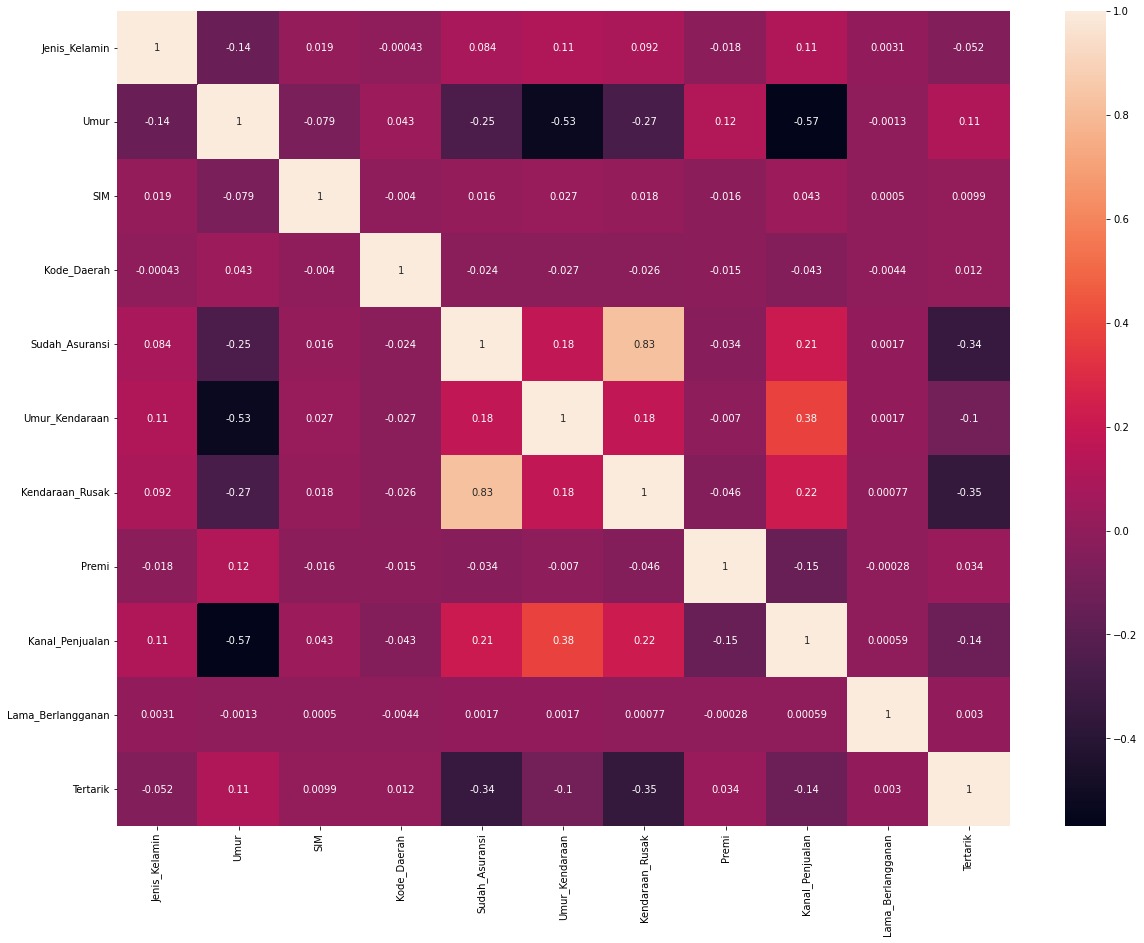

In [66]:
plt.subplots(figsize=(20,15))
sns.heatmap(dataframeCorr,annot=True)

In [67]:
minmax = (dataframe - dataframe.min(axis=0)) / (dataframe.max(axis=0) - dataframe.min(axis=0))
minmax

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.030769,1.0,1.000000,0.0,0.0,0.0,0.347857,0.782313,0.211073,1.0
1,0.0,0.523077,1.0,1.000000,0.0,0.0,0.0,0.591642,0.782313,0.650519,0.0
2,1.0,0.061538,1.0,1.000000,0.0,0.0,0.0,0.628459,0.782313,0.557093,0.0
3,1.0,0.892308,1.0,1.000000,0.0,1.0,0.0,0.579003,0.156463,0.685121,1.0
4,1.0,0.384615,1.0,1.000000,0.0,0.0,0.0,0.000000,0.156463,0.754325,0.0
...,...,...,...,...,...,...,...,...,...,...,...
333462,1.0,0.046154,1.0,0.076923,1.0,0.5,1.0,0.185935,0.938776,0.716263,0.0
333463,1.0,0.015385,1.0,0.884615,1.0,0.5,1.0,0.620885,0.938776,0.138408,0.0
333464,1.0,0.046154,1.0,0.961538,1.0,0.5,1.0,0.726011,0.938776,0.747405,0.0
333465,0.0,0.738462,1.0,0.134615,1.0,0.0,1.0,0.291764,0.782313,0.899654,0.0


## **Clustering KNN**

In [68]:
X_uji = minmax.iloc[:,[5,7]].values
X_uji = X_uji [:50000]
X_uji



array([[0.        , 0.34785667],
       [0.        , 0.59164244],
       [0.        , 0.62845887],
       ...,
       [0.        , 0.60648626],
       [0.5       , 0.12405028],
       [0.5       , 0.98874402]])

In [69]:
y = minmax[['Umur_Kendaraan', 'Kanal_Penjualan']]
y_uji = np.array(y)
y_uji = y_uji[:5000]
y_uji


array([[0.        , 0.78231293],
       [0.        , 0.78231293],
       [0.        , 0.78231293],
       ...,
       [0.        , 0.15646259],
       [0.        , 0.15646259],
       [0.5       , 0.93877551]])

In [70]:
def Centroid(k,data):
  centroid=np.array([]).reshape(data.shape[1],0)
  for i in range(k):
    rand=rd.randint(0,data.shape[0]-1)
    centroid=np.c_[centroid,data[rand]]
  return centroid

def Euclid(k,data):
  euclidian = np.array([]).reshape(data.shape[0],0)
  for j in range(k):
    dist = np.sum((data-centroid[:,j])**2, axis=1)
    euclidian=np.c_[euclidian, dist]
  return euclidian

def clustering(jarakMin,data):
  j = 0
  for j in range(k):
    cent[j+1]=np.array([]).reshape(2,0)
  for j in range(data.shape[0]):
    cent[minimum[j]]=np.c_[cent[minimum[j]],data[j]]
  for j in range(k):
    cent[j+1]=cent[j+1].T
  for j in range(k):
    centroid[:,j]=np.mean(cent[j+1], axis=0)
  return cent


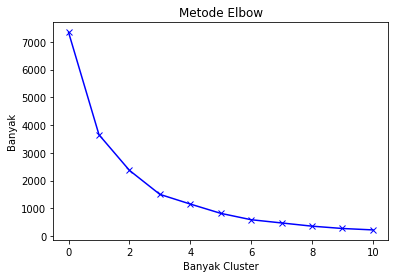

In [71]:
Arry = []
for i in range(1, 12):
    c = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    c.fit(X_uji)
    Arry.append(c.inertia_)
Arry

plt.plot(Arry, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Banyak Cluster')
plt.ylabel('Banyak')
plt.show()

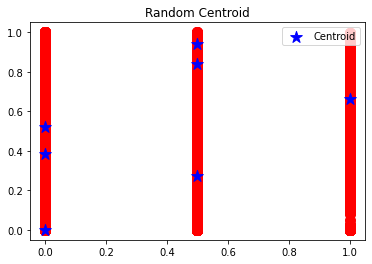

In [81]:
k = 7
centroid = Centroid(k,X_uji)

plt.scatter(X_uji[:,0],X_uji[:,1], s=100 ,c='red')
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Random Centroid')
plt.legend()
plt.show()

In [82]:
cluster = {}
n = 50
for i in range(n):
  minimum = np.argmin(Euclid(k,X_uji), axis=1)+1
  cent = {}
  #Hitung Mean Setiap Cluster
  cluster = clustering(minimum,X_uji)



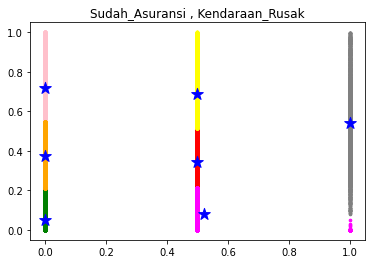

In [83]:
color=['red','yellow','green', 'magenta', 'grey', 'pink', 'orange']
labels=['Cluster 1','Cluster 2','Cluster 3', 'Cluster 4','Cluster 5', 'Cluster 6', 'Cluster 7']
for i in range(k):
  plt.scatter(cluster[i+1][:,0], cluster[i+1][:,1], c = color[i], label = labels[i], s=7)
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Sudah_Asuransi , Kendaraan_Rusak')
plt.show()

In [74]:
cluster

{1: array([[0.        , 0.59164244],
        [0.        , 0.62845887],
        [0.        , 0.99749085],
        ...,
        [0.        , 0.73342088],
        [0.        , 0.79877591],
        [0.        , 0.60648626]]), 2: array([[0.5       , 0.39327924],
        [0.5       , 0.33179345],
        [0.5       , 0.37025138],
        ...,
        [0.5       , 0.33343495],
        [0.5       , 0.38450896],
        [0.5       , 0.12405028]]), 3: array([[0.       , 0.       ],
        [0.       , 0.       ],
        [0.       , 0.       ],
        ...,
        [0.       , 0.       ],
        [0.       , 0.       ],
        [0.       , 0.1116687]]), 4: array([[0.        , 0.34785667],
        [0.        , 0.38007692],
        [0.        , 0.38751055],
        ...,
        [0.        , 0.40699747],
        [0.        , 0.29394522],
        [0.        , 0.34727042]]), 5: array([[1.        , 0.57900291],
        [1.        , 0.96079167],
        [0.5       , 0.44081231],
        ...,
        [0

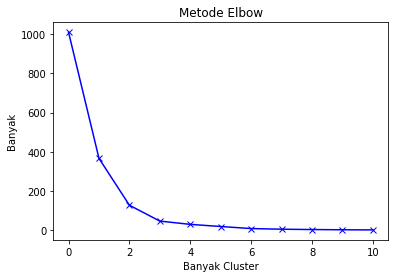

In [75]:
Arry = []
for i in range(1, 12):
    c = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    c.fit(y_uji)
    Arry.append(c.inertia_)
Arry

plt.plot(Arry, 'bx-')
plt.title('Metode Elbow')
plt.xlabel('Banyak Cluster')
plt.ylabel('Banyak')
plt.show()

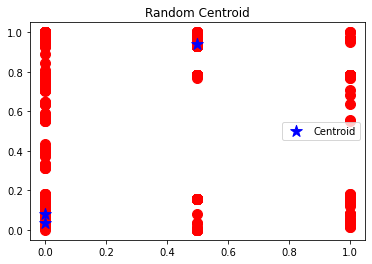

In [76]:
k = 3
centroid = Centroid(k,y_uji)

plt.scatter(y_uji[:,0],y_uji[:,1], s=100 ,c='red')
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Random Centroid')
plt.legend()
plt.show()

In [77]:
cluster = {}
n = 50
for i in range(n):
  minimum = np.argmin(Euclid(k,y_uji), axis=1)+1
  cent = {}
  #Hitung Mean Setiap Cluster
  cluster = clustering(minimum,y_uji)

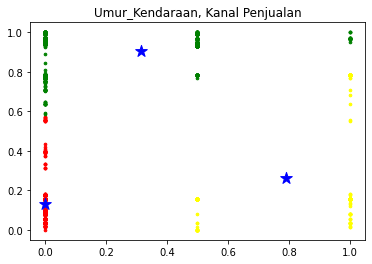

In [80]:
color=['yellow','red','green']
labels=['Cluster 1','Cluster 2','Cluster 3']
for i in range(k):
  plt.scatter(cluster[i+1][:,0], cluster[i+1][:,1], c = color[i], label = labels[i], s=7)
plt.scatter(centroid[0,:], centroid[1,:],marker='*', c='blue', label='Centroid', s=150)
plt.title('Umur_Kendaraan, Kanal Penjualan')
plt.show()

In [79]:
cluster

{1: array([[1.        , 0.15646259],
        [1.        , 0.78231293],
        [1.        , 0.15646259],
        [1.        , 0.78231293],
        [1.        , 0.15646259],
        [1.        , 0.68027211],
        [0.5       , 0.15646259],
        [1.        , 0.15646259],
        [1.        , 0.78231293],
        [1.        , 0.01360544],
        [1.        , 0.15646259],
        [1.        , 0.78231293],
        [1.        , 0.15646259],
        [1.        , 0.78231293],
        [0.5       , 0.        ],
        [1.        , 0.78231293],
        [0.5       , 0.15646259],
        [1.        , 0.15646259],
        [0.5       , 0.03401361],
        [1.        , 0.17687075],
        [1.        , 0.15646259],
        [0.5       , 0.        ],
        [1.        , 0.15646259],
        [1.        , 0.03401361],
        [0.5       , 0.        ],
        [1.        , 0.15646259],
        [0.5       , 0.03401361],
        [1.        , 0.14965986],
        [1.        , 0.1292517 ],
        [1.